In [1]:
#!pip install torch torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

Cloning into 'ants_and_bees'...
remote: Enumerating objects: 408, done.
ceiving objects:   6% (25/408), 1.87 MiB | 948.00 KiB/sReceiving objects:   7% (31/408), 2.34 MiB | 951.00 KiB/sReceiving objects:   9% (37/408), 3.29 MiB | 953.00 KiB/sReceiving objects:  10% (41/408), 3.75 MiB | 953.00 KiB/sReceiving objects:  11% (47/408), 4.68 MiB | 955.00 KiB/sReceiving objects:  13% (54/408), 5.15 MiB | 955.00 KiB/sReceiving objects:  14% (58/408), 5.62 MiB | 956.00 KiB/sReceiving objects:  15% (64/408), 6.55 MiB | 952.00 KiB/sReceiving objects:  17% (70/408), 7.02 MiB | 952.00 KiB/sReceiving objects:  18% (74/408), 7.49 MiB | 951.00 KiB/sReceiving objects:  19% (80/408), 8.41 MiB | 949.00 KiB/sReceiving objects:  21% (86/408), 8.88 MiB | 949.00 KiB/sReceiving objects:  22% (90/408), 9.34 MiB | 949.00 KiB/sReceiving objects:  24% (98/408), 9.82 MiB | 951.00 KiB/sReceiving objects:  25% (102/408), 10.11 MiB | 869.00 KiB/sReceiving objects:  27% (111/408), 11.01 MiB | 965.00 KiB/sReceiving obje

In [7]:
!ls

Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf
Images
Images.zip
NIPS-2015-texture-synthesis-using-convolutional-neural-networks-Paper.pdf
Style_Transfer.ipynb
Transfer_Learning.ipynb
ants_and_bees
eliot_andres.txt
vgg19.png


In [6]:
!ls ants_and_bees

train val


In [8]:
!ls ants_and_bees/train

ants bees


In [9]:
!ls ants_and_bees/train/ants

0013035.jpg                   408393566_b5b694119b.jpg
1030023514_aad5c608f9.jpg     424119020_6d57481dab.jpg
1095476100_3906d8afde.jpg     424873399_47658a91fb.jpg
1099452230_d1949d3250.jpg     450057712_771b3bfc91.jpg
116570827_e9c126745d.jpg      45472593_bfd624f8dc.jpg
1225872729_6f0856588f.jpg     459694881_ac657d3187.jpg
1262877379_64fcada201.jpg     460372577_f2f6a8c9fc.jpg
1269756697_0bce92cdab.jpg     460874319_0a45ab4d05.jpg
1286984635_5119e80de1.jpg     466430434_4000737de9.jpg
132478121_2a430adea2.jpg      470127037_513711fd21.jpg
1360291657_dc248c5eea.jpg     474806473_ca6caab245.jpg
1368913450_e146e2fb6d.jpg     475961153_b8c13fd405.jpg
1473187633_63ccaacea6.jpg     484293231_e53cfc0c89.jpg
148715752_302c84f5a4.jpg      49375974_e28ba6f17e.jpg
1489674356_09d48dde0a.jpg     506249802_207cd979b4.jpg
149244013_c529578289.jpg      506249836_717b73f540.jpg
150801003_3390b73135.jpg      512164029_c0a66b8498.jpg
150801171_cd86f17ed8.jpg      512863248_43c8ce579b.jpg
154124431_65

In [10]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])


transform_test = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.ImageFolder('ants_and_bees/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('ants_and_bees/val', transform=transform_test)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=False)

In [11]:
print(len(training_dataset))
print(len(validation_dataset))

244
153


In [12]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [13]:
classes = ('ant', 'bee')

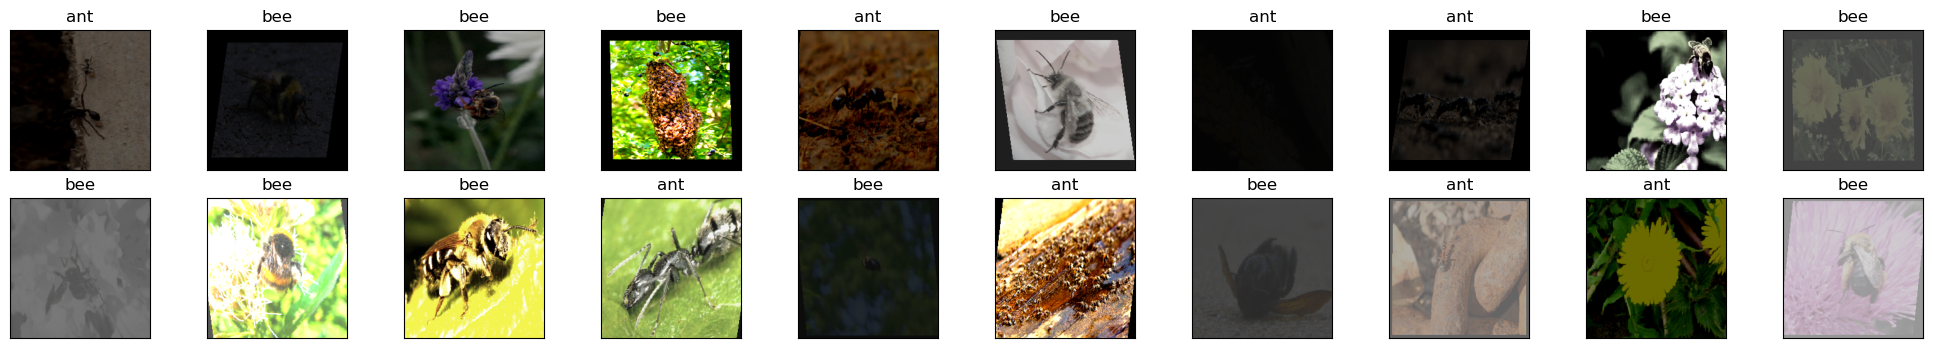

In [14]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [15]:
model = models.vgg16(pretrained=True)

/opt/anaconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/MacBook/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [08:49<00:00, 1.05MB/s] 


In [16]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
for param in model.features.parameters():
  param.requires_grad = False

In [18]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)
print(model.classifier[6].out_features)

2


In [25]:
from torchsummary import summary
summary(model,input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [27]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0306, acc 0.7254 
validation loss: 0.0123, validation acc 0.9346 
epoch : 2
training loss: 0.0199, acc 0.8320 
validation loss: 0.0137, validation acc 0.9281 
epoch : 3
training loss: 0.0121, acc 0.8893 
validation loss: 0.0134, validation acc 0.9281 
epoch : 4
training loss: 0.0139, acc 0.8770 
validation loss: 0.0154, validation acc 0.9281 
epoch : 5
training loss: 0.0131, acc 0.8648 
validation loss: 0.0209, validation acc 0.9085 


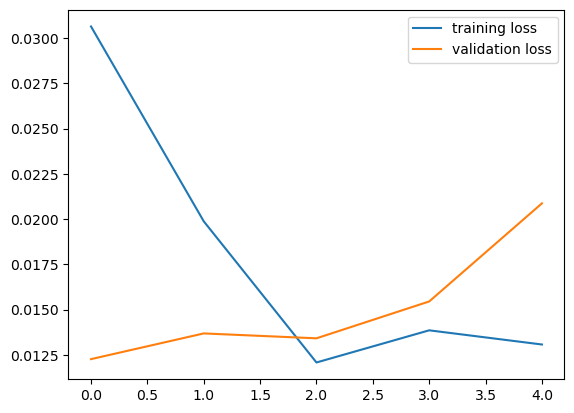

In [28]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

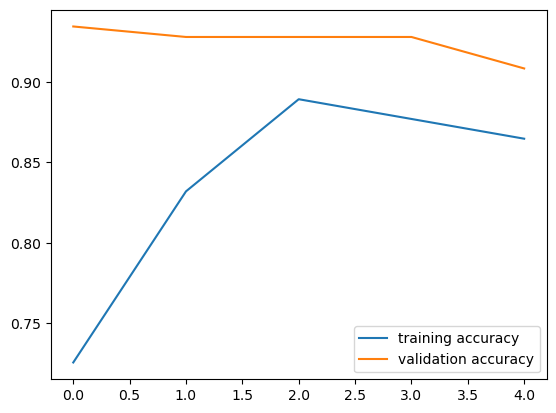

In [29]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

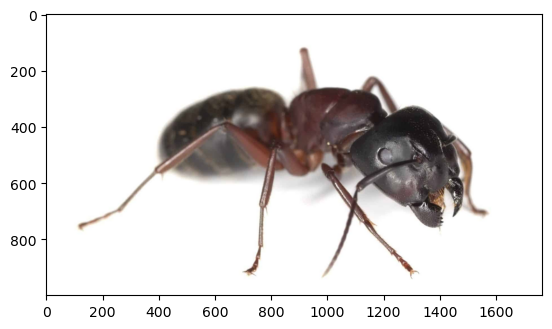

In [21]:
import requests
from PIL import Image

url = 'https://www.modernpest.com/uploads/Carpenter-ant1-e1461850875246-1766x1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

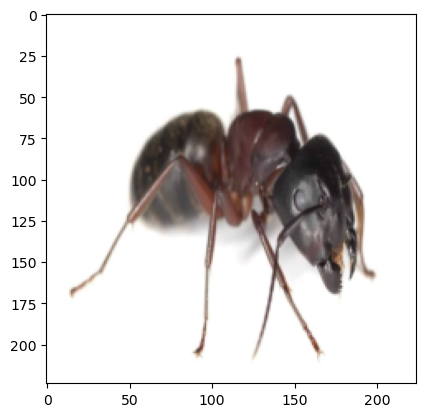

In [23]:
img = transform_test(img) 
plt.imshow(im_convert(img))

In [30]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

ant


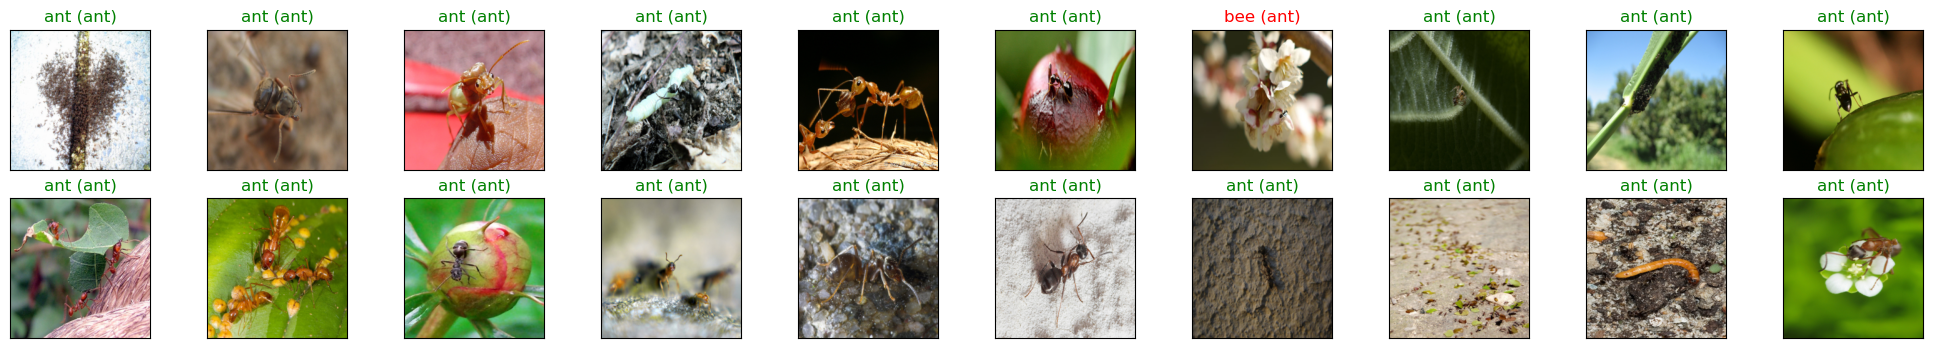

In [31]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))